In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.optimizers import Adam
from keras import backend as K
from keras.utils import to_categorical,plot_model
from keras.layers import Dense
import tensorflow



In [2]:
# importing the datset
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
a=np.unique(y_train,return_counts=True)


In [5]:
b=list(zip(a[0],a[1]))

In [6]:
b

[(0, 5923),
 (1, 6742),
 (2, 5958),
 (3, 6131),
 (4, 5842),
 (5, 5421),
 (6, 5918),
 (7, 6265),
 (8, 5851),
 (9, 5949)]

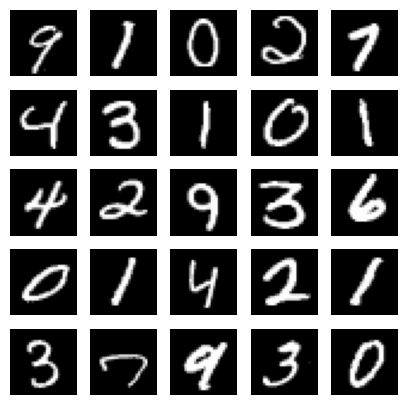

In [7]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
# plt.savefig("mnist-samples.png")
# plt.close('all')

In [8]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [9]:
len(np.unique(y_train))

10

In [10]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train.shape[1]

28

In [14]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [15]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) #add -1 to match new reshape with original train data.
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [16]:
x_train.shape

(60000, 784)

In [17]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [19]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size,activation = 'relu'))
model.add(Dense(hidden_units,activation = 'relu'))
model.add(Dense(num_labels, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [21]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [22]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 13s 16ms/step - loss: 0.3136 - accuracy: 0.9112 - val_loss: 0.1598 - val_accuracy: 0.9547
Epoch 2/20
329/329 [==============================] - 5s 15ms/step - loss: 0.1143 - accuracy: 0.9660 - val_loss: 0.1258 - val_accuracy: 0.9601
Epoch 3/20
329/329 [==============================] - 4s 14ms/step - loss: 0.0778 - accuracy: 0.9765 - val_loss: 0.1047 - val_accuracy: 0.9688
Epoch 4/20
329/329 [==============================] - 4s 12ms/step - loss: 0.0556 - accuracy: 0.9832 - val_loss: 0.0991 - val_accuracy: 0.9708
Epoch 5/20
329/329 [==============================] - 5s 14ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.1039 - val_accuracy: 0.9707
Epoch 6/20
329/329 [==============================] - 5s 14ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.1011 - val_accuracy: 0.9710
Epoch 7/20
329/329 [==============================] - 5s 15ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0967 - val_accuracy: 0.973

In [23]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

loss, acc = model.evaluate(x_train, y_train)
print("\nTrain accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.1211 - accuracy: 0.9769

Test accuracy: 97.7%
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0503 - accuracy: 0.9901

Train accuracy: 99.0%


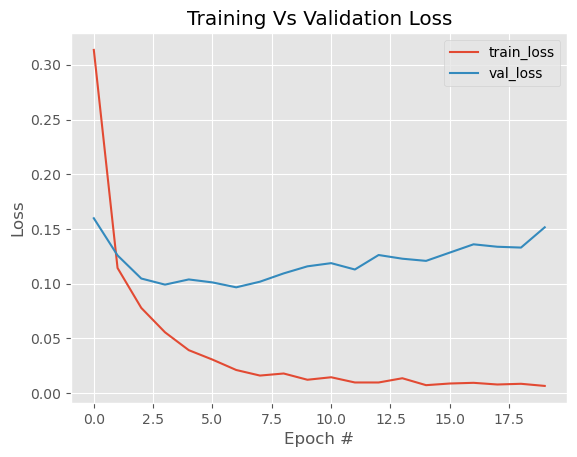

In [29]:
# plot training and validation loss
plt.style.use("ggplot")
plt.plot( H.history["loss"], label="train_loss")
plt.plot( H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [27]:
H.history

{'loss': [0.3135767877101898,
  0.11432032287120819,
  0.07783707976341248,
  0.055561959743499756,
  0.0392526350915432,
  0.030623652040958405,
  0.021129185333848,
  0.016037117689847946,
  0.017920982092618942,
  0.012209651060402393,
  0.014491157606244087,
  0.00972595065832138,
  0.009712103754281998,
  0.013588537462055683,
  0.0072631994262337685,
  0.00877717137336731,
  0.009405872784554958,
  0.007878151722252369,
  0.008518973365426064,
  0.006572579499334097],
 'accuracy': [0.9111666679382324,
  0.9660000205039978,
  0.9764524102210999,
  0.9831904768943787,
  0.9874047636985779,
  0.9906428456306458,
  0.9934762120246887,
  0.9949761629104614,
  0.9940476417541504,
  0.9961428642272949,
  0.99528568983078,
  0.9966428279876709,
  0.996666669845581,
  0.9953333139419556,
  0.9976428747177124,
  0.9969047904014587,
  0.9971428513526917,
  0.9975714087486267,
  0.9973809719085693,
  0.9980238080024719],
 'val_loss': [0.15977515280246735,
  0.1258222907781601,
  0.1047035679

In [30]:
# Adding L2 Regualarisation

In [31]:
from keras.layers import Dense , Activation, Dropout
import keras


model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 6s 16ms/step - loss: 0.5031 - accuracy: 0.9092 - val_loss: 0.2938 - val_accuracy: 0.9519
Epoch 2/20
329/329 [==============================] - 5s 14ms/step - loss: 0.2344 - accuracy: 0.9626 - val_loss: 0.2134 - val_accuracy: 0.9633
Epoch 3/20
329/329 [==============================] - 5s 14ms/step - loss: 0.1767 - accuracy: 0.9717 - val_loss: 0.1837 - val_accuracy: 0.9671
Epoch 4/20
329/329 [==============================] - 4s 13ms/step - loss: 0.1490 - accuracy: 0.9760 - val_loss: 0.1615 - val_accuracy: 0.9712
Epoch 5/20
329/329 [==============================] - 5s 15ms/step - loss: 0.1317 - accuracy: 0.9788 - val_loss: 0.1632 - val_accuracy: 0.9698
Epoch 6/20
329/329 [==============================] - 5s 14ms/step - loss: 0.1225 - accuracy: 0.9809 - val_loss: 0.1495 - val_accuracy: 0.9728
Epoch 7/20
329/329 [==============================] - 5s 14ms/step - loss: 0.1132 - accuracy: 0.9824 - val_loss: 0.1566 - val_accuracy: 0.9707

In [32]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

loss, acc = model.evaluate(x_train, y_train)
print("\nTrain accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.1334 - accuracy: 0.9759

Test accuracy: 97.6%
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0945 - accuracy: 0.9866

Train accuracy: 98.7%


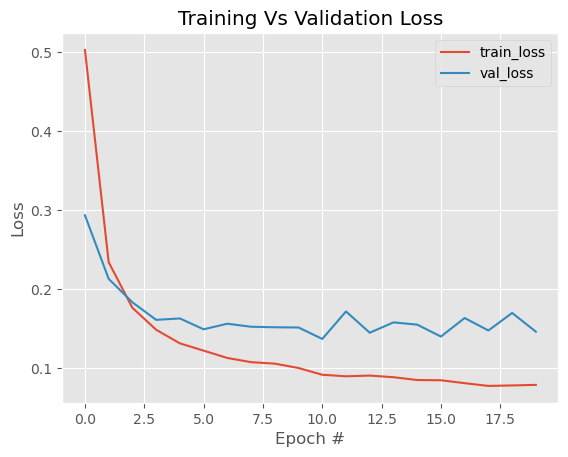

In [33]:
# plot training and validation loss
plt.style.use("ggplot")
plt.plot( H.history["loss"], label="train_loss")
plt.plot( H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [34]:
# Adding the Droping 

In [ ]:
from keras.layers import Dense , Activation, Dropout

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

In [35]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

loss, acc = model.evaluate(x_train, y_train)
print("\nTrain accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.1334 - accuracy: 0.9759

Test accuracy: 97.6%
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0945 - accuracy: 0.9866

Train accuracy: 98.7%


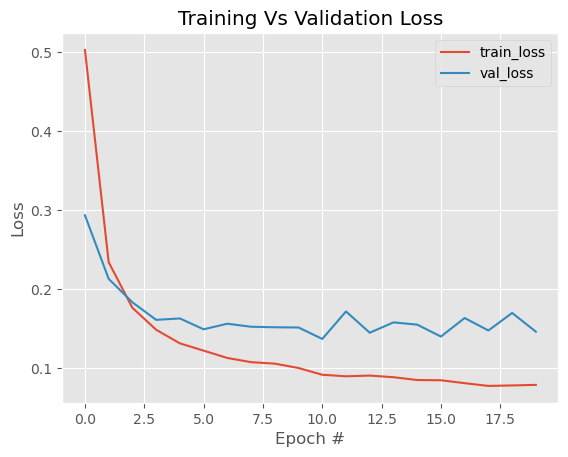

In [36]:
# plot training and validation loss
plt.style.use("ggplot")
plt.plot( H.history["loss"], label="train_loss")
plt.plot( H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()